<a href="https://colab.research.google.com/github/Siddarth-S-Nair/Python-Project/blob/main/UBER_PROJECT_USING_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UBER TRIP ANALYSIS USING PYTHON**

## **Import the Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

In [ ]:
data = pd.read_csv('/content/Uber Drives - .csv')
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


## **Data Cleaning**

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

,0
START_DATE*,0
END_DATE*,0
CATEGORY*,0
START*,0
STOP*,0
MILES*,0
PURPOSE*,0


In [ ]:
data.dtypes

,0
START_DATE*,object
END_DATE*,object
CATEGORY*,object
START*,object
STOP*,object
MILES*,float64
PURPOSE*,object


In [ ]:
data['START_DATE*'] = pd.to_datetime(data['START_DATE*'],format = '%m/%d/%Y %H:%M')
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'],format = '%m/%d/%Y %H:%M')

In [ ]:
hour = []
day = []
dayofweek = []
month = []
weekday = []

for i in data['START_DATE*']:
  hour.append(i.hour)
  day.append(i.day)
  dayofweek.append(i.dayofweek)
  month.append(i.month)
  weekday.append(calendar.day_name[dayofweek[-1]])

data['HOUR'] = hour
data['DAY'] = day
data['DAYOFWEEK'] = dayofweek
data['MONTH'] = month
data['WEEKDAY'] = weekday

In [ ]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAYOFWEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


## **Categories We Have**

In [ ]:
data['CATEGORY*'].value_counts()

,count
CATEGORY*,
Business,647
Personal,6


<Axes: xlabel='CATEGORY*', ylabel='count'>

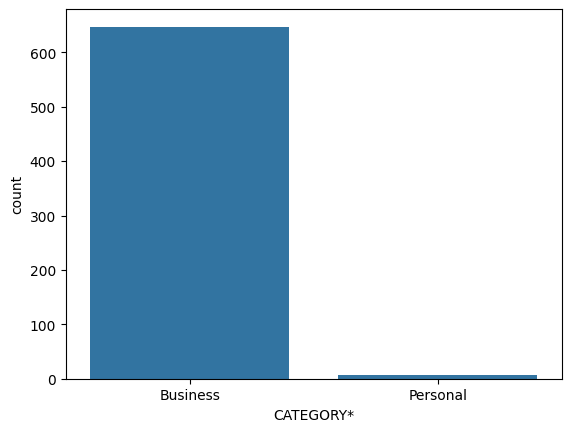

In [ ]:
sns.countplot(x = 'CATEGORY*',data = data)

## **How long do people travel with Uber**

<Axes: ylabel='Frequency'>

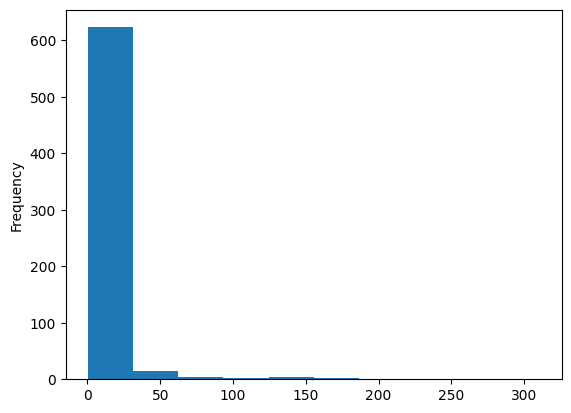

In [ ]:
data['MILES*'].plot.hist()

## **What Hour Do Most People Take Uber To Their Destination?**

Text(0.5, 1.0, 'Number of trips VS Hours')

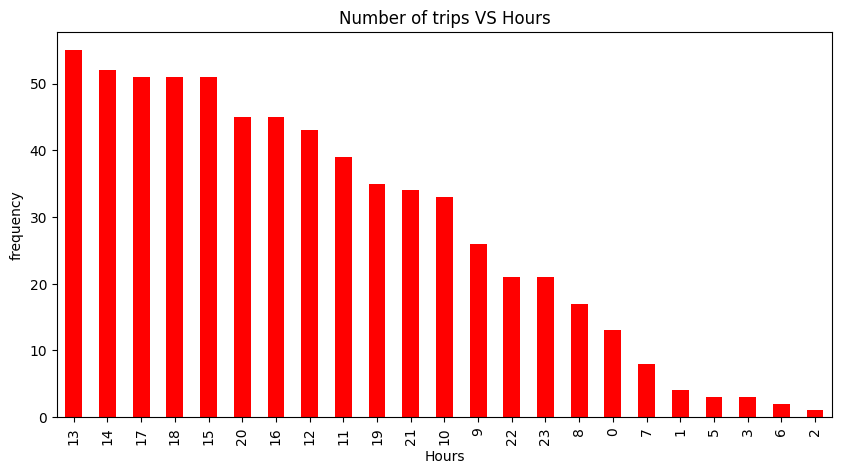

In [ ]:
hours = data['START_DATE*'].dt.hour.value_counts()
hours.plot(kind = 'bar',color = 'red', figsize=(10,5))

plt.xlabel('Hours')
plt.ylabel('frequency')
plt.title('Number of trips VS Hours')

## **Check The Purpose Of Trips**

Text(0.5, 1.0, 'Number of peoples VS Purpose')

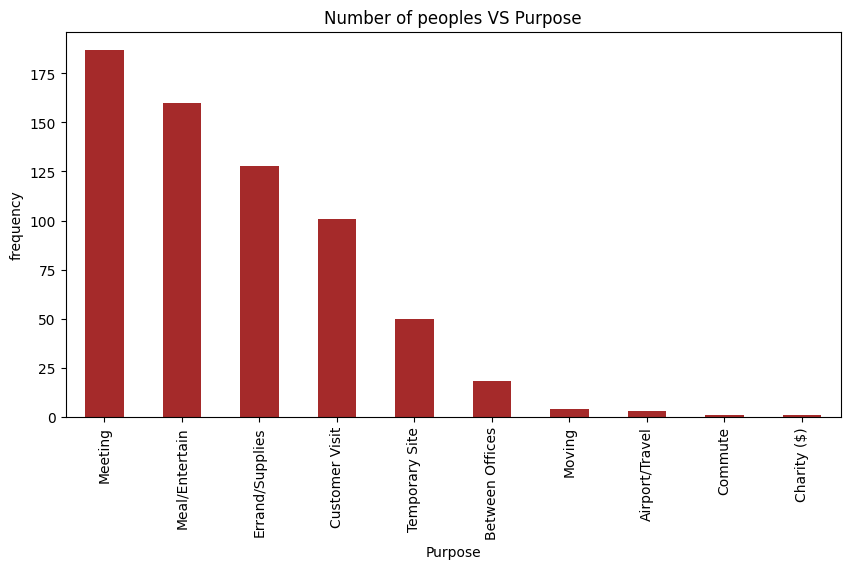

In [ ]:
data['PURPOSE*'].value_counts().plot(kind = 'bar' , color = 'brown' , figsize = (10,5))

plt.xlabel('Purpose')
plt.ylabel('frequency')
plt.title('Number of peoples VS Purpose')

## **Which Day Has The Highest Number Of Trips**

Text(0.5, 1.0, 'Number of trips VS Weekday')

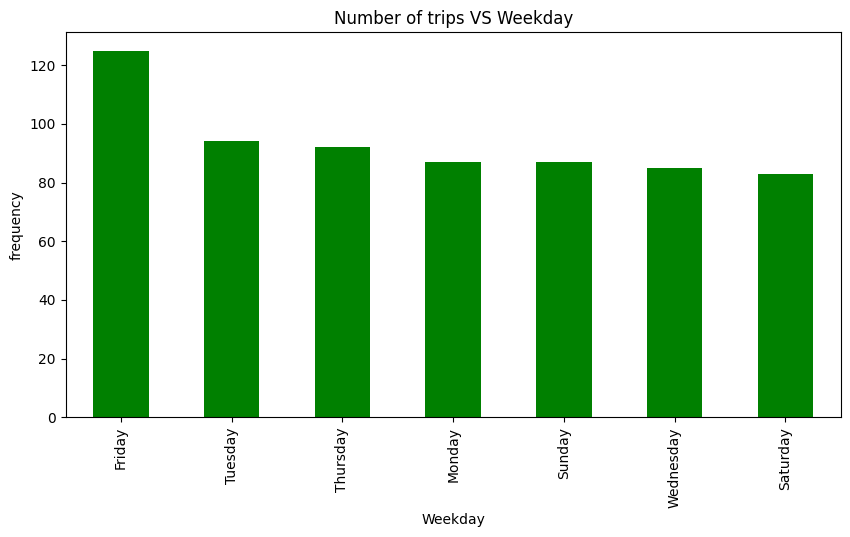

In [ ]:
data['WEEKDAY'].value_counts().plot(kind = 'bar' , color = 'green' , figsize = (10,5))

plt.xlabel('Weekday')
plt.ylabel('frequency')
plt.title('Number of trips VS Weekday')

## **What Are The Number Of Trips Per Each Day?**

Text(0.5, 1.0, 'Number of trips VS Days')

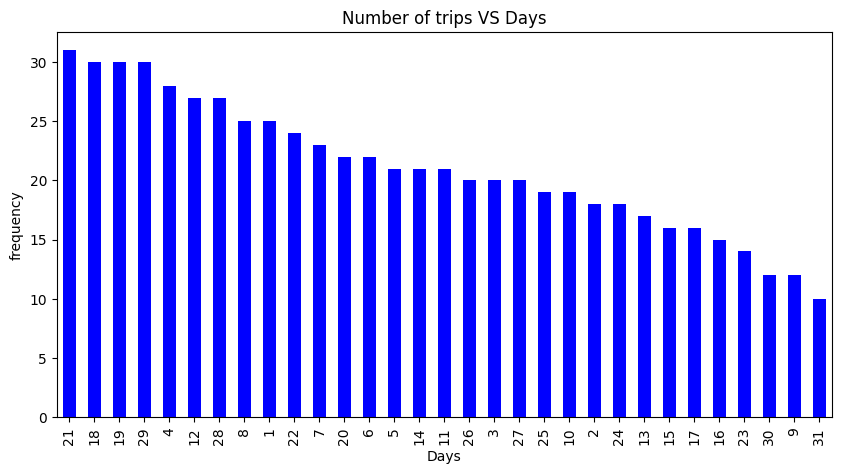

In [ ]:
data['DAY'].value_counts().plot(kind = 'bar' , color = 'blue' , figsize = (10,5))

plt.xlabel('Days')
plt.ylabel('frequency')
plt.title('Number of trips VS Days')

## **What Are The Number Of Trips In The Month?**

Text(0.5, 1.0, 'Number of trips VS Months')

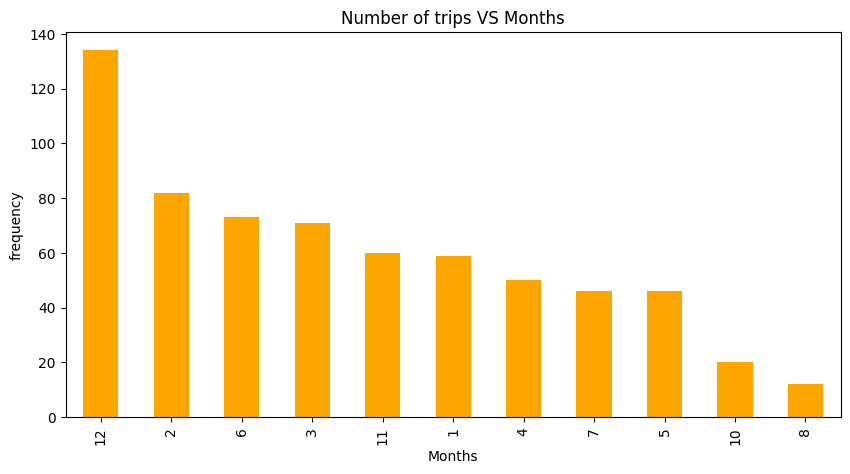

In [ ]:
data['MONTH'].value_counts().plot(kind = 'bar' , color = 'orange' , figsize = (10,5))

plt.xlabel('Months')
plt.ylabel('frequency')
plt.title('Number of trips VS Months')

## **The Starting Points Of Trips . Where Do People Start Boarding Their Trip From Most**.

Text(0.5, 1.0, 'Number of trips VS Starting_point')

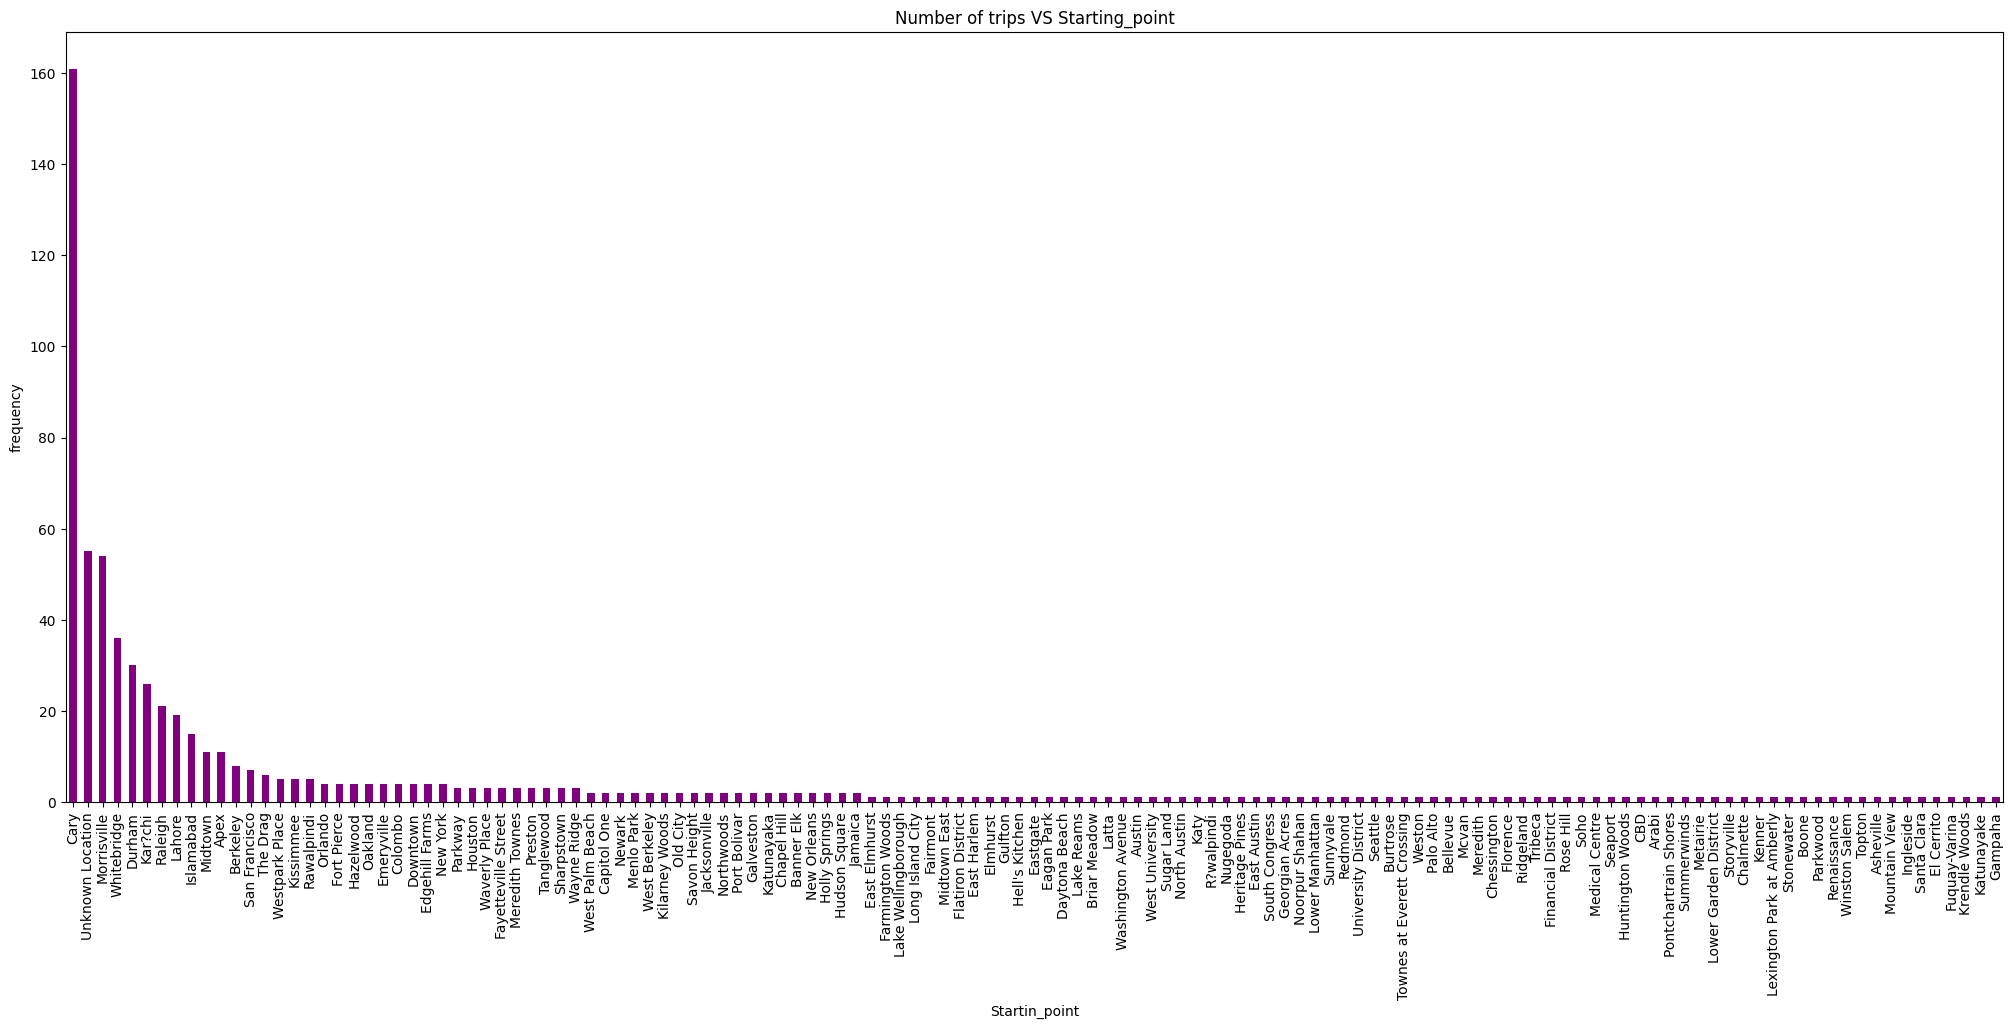

In [ ]:
data['START*'].value_counts().plot(kind = 'bar' , color = 'purple' , figsize = (25,10))

plt.xlabel('Startin_point')
plt.ylabel('frequency')
plt.title('Number of trips VS Starting_point')